# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns 
import numpy as np

print('Berhasil')

Berhasil


# Read CSV Gender Submission

In [2]:
df_gender_submission = pd.read_csv('C:\\Users\Admin\Documents\GitHub\Portofolio-Data-Analyst\Project 3\gender_submission.csv')
df_gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Read CSV Train

In [3]:
df_train = pd.read_csv(r'C:\Users\Admin\Documents\GitHub\Portofolio-Data-Analyst\Project 3\train.csv',encoding = 'utf-8')
# Cek Jumlah baris dan kolom
df_train.shape

(891, 12)

# Read CSV Test

In [4]:
df_test = pd.read_csv(r'C:\Users\Admin\Documents\GitHub\Portofolio-Data-Analyst\Project 3\test.csv')
# Cek Jumlah baris dan kolom
df_test.shape

(418, 11)

Statistical Information

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
# Cek informasi didataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing Value

In [8]:
df_train_no_missing_val = df_train.copy() 

# Hitung nilai rata-rata dari kolom 'Age' tanpa nilai NaN
mean_age = df_train_no_missing_val['Age'].dropna().mean()

# Mengganti nilai-nilai NaN di kolom 'Age' dengan nilai rata-rata
df_train_no_missing_val['Age'] = df_train_no_missing_val['Age'].fillna(mean_age)

In [9]:
# Mengubah tipe data menjadi integer
df_train_no_missing_val['Age'] = df_train_no_missing_val['Age'].astype(int)
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [10]:
df_train_no_missing_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


Fill in missing value on 'Embarked'

In [11]:
# Menghitung frekuensi nilai unique (cara 1)
df_train_no_missing_val['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
# Menghitung frekuensi nilai unique (cara 2)
count_embarked = {"S" : 0, "C" : 0, "Q" : 0}
for val in df_train_no_missing_val["Embarked"]:
    if val == "S":
        count_embarked["S"] += 1
    elif val == "Q":
        count_embarked["Q"] += 1
    elif val == "C":
        count_embarked["C"] += 1
    else :
        pass
count_embarked

{'S': 644, 'C': 168, 'Q': 77}

In [13]:
# Merubah missing value pada Embarked -> Menjadi S
df_train_no_missing_val['Embarked'] = df_train_no_missing_val['Embarked'].fillna('S')
print('Berhasil')

Berhasil


In [14]:
# Setelah mengganti NaN
df_train_no_missing_val['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

# Data Visualization

In [15]:
df_sex_survived_rate = df_train_no_missing_val[['Survived','Sex']].groupby('Sex', as_index=False).mean()
df_sex_survived_rate

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
df_sex_survived_num = df_train_no_missing_val[['Survived','Sex']].groupby('Sex', as_index=False).sum()
df_sex_survived_num

,Sex,Survived
0,female,233
1,male,109


In [17]:
print('Female Population :', round(233/0.742038))
print('Male Population :', round(109/0.188908))

Female Population : 314
Male Population : 577


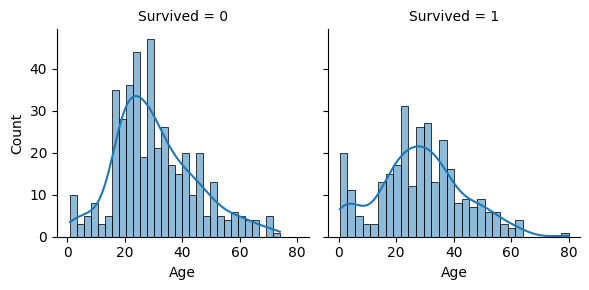

In [18]:
grid = sns.FacetGrid(
    data=df_train,
    col='Survived'
)

grid.map(sns.histplot, 'Age', kde=True, bins=30)

# Drop Unnecessary Columns (Ticket, Fare, Cabin)

In [19]:
for data in [df_train_no_missing_val, df_test]:
    data.drop(['Ticket','Fare','Cabin'],axis = 1, inplace=True)
print('Berhasil')

Berhasil


# Replace categorical features to numeric features (Data Preprocessing)

Convert sex values to numeric

In [14]:
# # # Contoh 1 Dataframe
# genderid = {'male': 0, 'female': 1}

# df_train_no_missing_val['Sex'] = df_train_no_missing_val['Sex'].map(genderid)
# df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,29.699118,S


In [20]:
# Contoh Convert Multiple Dataframe
genderid = {'male': 0, 'female': 1}

for data in [df_train_no_missing_val,df_test]:
    data['Sex'] = data['Sex'].map(genderid)
print('Berhasil')

Berhasil


In [21]:
# setelah replace
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,S


Convert embarked values to numeric

In [22]:
df_train_no_missing_val['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [23]:
embarkedid = {'S':0, 'C':1, 'Q':2}

for data in [df_train_no_missing_val, df_test]:
    data['Embarked'] = data['Embarked'].map(embarkedid)
print('Berhasil')

Berhasil


In [24]:
# Merubah tipe data kolom Embarked
df_train_no_missing_val['Embarked']= df_train_no_missing_val['Embarked'].astype(int)

In [25]:
df_train_no_missing_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int32 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Embarked     891 non-null    int32 
dtypes: int32(2), int64(6), object(1)
memory usage: 55.8+ KB


In [26]:
# Menambah kolom baru "Title" diambil dari kolom Name dengan regex
for data in [df_train_no_missing_val, df_test]:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
print('berhasil')

berhasil


In [27]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,0,Mr


In [28]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,2,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,2,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,0,Mrs


In [29]:
# Membuat tabel silang antara kolom 'Title' dan 'Sex'
cross_tab = pd.crosstab(df_train_no_missing_val['Title'], df_train_no_missing_val['Sex'])
cross_tab

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


Replace Title

In [30]:
for dataset in [df_train_no_missing_val,df_test]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
print('berhasil')

berhasil


In [31]:
df_train_no_missing_val[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Drop name columns

In [32]:
# Menghapus kolom Name karna sudah menggunakan kolom Title
for data in [df_train_no_missing_val, df_test]:
    data.drop(['Name'], axis=1, inplace=True)

Convert Title values to numeric

In [33]:
# Merubah Title menjadi numerical
titleid = {'Rare':0, 'Master':1, 'Mr':2, 'Mrs':3, 'Miss':4}

for data in [df_train_no_missing_val, df_test]:
    data["Title"]=data["Title"].map(titleid)

Add new column "IsAlone" corelated to column "SibSp" and "Parch"

In [34]:
# Membuat kolom baru FamilySize dengan menggabungkan data seluruh info terkait banyaknya kerabay yang dibawa penumpang
for dataset in [df_train_no_missing_val,df_test]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [35]:
df_train_no_missing_val[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [36]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FamilySize
0,1,0,3,0,22,1,0,0,2,2
1,2,1,1,1,38,1,0,1,3,2
2,3,1,3,1,26,0,0,0,4,1
3,4,1,1,1,35,1,0,0,3,2
4,5,0,3,0,35,0,0,0,2,1


In [37]:
# Membuat kolom baru "IsAlone" berdasarkan kolom "FamilySize"
for dataset in [df_train_no_missing_val, df_test]:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [38]:
df_train_no_missing_val[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [39]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FamilySize,IsAlone
0,1,0,3,0,22,1,0,0,2,2,0
1,2,1,1,1,38,1,0,1,3,2,0
2,3,1,3,1,26,0,0,0,4,1,1
3,4,1,1,1,35,1,0,0,3,2,0
4,5,0,3,0,35,0,0,0,2,1,1


In [40]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FamilySize,IsAlone
0,892,3,0,34.5,0,0,2,2,1,1
1,893,3,1,47.0,1,0,0,3,2,0
2,894,2,0,62.0,0,0,2,2,1,1
3,895,3,0,27.0,0,0,0,2,1,1
4,896,3,1,22.0,1,1,0,3,3,0


Drop Column "SibSp" dan "Parch"

In [41]:
# Menghapus kolom 'SibSp','Parch','FamilySize' karna sudah menggunakan kolom IsAlone
for data in [df_train_no_missing_val, df_test]:
    data.drop(['SibSp','Parch','FamilySize'], axis=1, inplace=True)

In [42]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone
0,1,0,3,0,22,0,2,0
1,2,1,1,1,38,1,3,0
2,3,1,3,1,26,0,4,1
3,4,1,1,1,35,0,3,0
4,5,0,3,0,35,0,2,1


In [43]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,IsAlone
0,892,3,0,34.5,2,2,1
1,893,3,1,47.0,0,3,0
2,894,2,0,62.0,2,2,1
3,895,3,0,27.0,0,2,1
4,896,3,1,22.0,0,3,0


### Add new column AgeCategory
buat rentan umur secara otomatis, supaya nanti akan menjadi 5 rentang tertentu yang sama banyak

In [44]:
df_train_no_missing_val['AgeCategory'] = pd.cut(df_train_no_missing_val['Age'], 5)

In [45]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone,AgeCategory
0,1,0,3,0,22,0,2,0,"(16.0, 32.0]"
1,2,1,1,1,38,1,3,0,"(32.0, 48.0]"
2,3,1,3,1,26,0,4,1,"(16.0, 32.0]"
3,4,1,1,1,35,0,3,0,"(32.0, 48.0]"
4,5,0,3,0,35,0,2,1,"(32.0, 48.0]"


In [46]:
df_train_no_missing_val[['AgeCategory', 'Survived']].groupby(['AgeCategory'], as_index=False).mean().sort_values(by='AgeCategory', ascending=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12924\2208977496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train_no_missing_val[['AgeCategory', 'Survived']].groupby(['AgeCategory'], as_index=False).mean().sort_values(by='AgeCategory', ascending=True)


,AgeCategory,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [47]:
for dataset in [df_train_no_missing_val, df_test]:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [48]:
df_train_no_missing_val['Age'].value_counts()

Age
1    525
2    186
0    100
3     69
4     11
Name: count, dtype: int64

In [49]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone,AgeCategory
0,1,0,3,0,1,0,2,0,"(16.0, 32.0]"
1,2,1,1,1,2,1,3,0,"(32.0, 48.0]"
2,3,1,3,1,1,0,4,1,"(16.0, 32.0]"
3,4,1,1,1,2,0,3,0,"(32.0, 48.0]"
4,5,0,3,0,2,0,2,1,"(32.0, 48.0]"


Drop column AgeCategory

In [50]:
df_train_no_missing_val.drop(['AgeCategory'], axis=1, inplace=True)

In [51]:
df_train_no_missing_val.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone
0,1,0,3,0,1,0,2,0
1,2,1,1,1,2,1,3,0
2,3,1,3,1,1,0,4,1
3,4,1,1,1,2,0,3,0
4,5,0,3,0,2,0,2,1


In [52]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,IsAlone
0,892,3,0,2.0,2,2,1
1,893,3,1,2.0,0,3,0
2,894,2,0,3.0,2,2,1
3,895,3,0,1.0,0,2,1
4,896,3,1,1.0,0,3,0


# Modeling

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [53]:
# Import Machine Learning
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Langkah Modelling :
- Impor library yang diperlukan.
- Bagi data atau lakukan assignment terlebih dahulu.
- Periksa indeks variabel, pastikan sesuai.
- Latih model dengan .fit(x, y).
- Lakukan prediksi dengan .predict(x).
- Hitung skor menggunakan accuracy_score(label_test, pred).
- Coba finetuning untuk nilai C yang berbeda-beda.
- Simpan skor yang telah di-append dalam sebuah list scores.
- Visualisasikan hasilnya.

Split train data
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- pecah dataframe latih  menjadi dataframe latih baru dan dataframe validasi (df_train -> df_train_baru & df_val)

In [54]:
# Split cara ke 1
df_train, df_test = train_test_split(df_train_no_missing_val, test_size=0.25, random_state=123)

In [55]:
print(df_train_no_missing_val.shape, df_train.shape, df_test.shape)

(891, 8) (668, 8) (223, 8)


Assign to specific X and y variables

In [79]:
X_train = df_train_no_missing_val.drop(["Survived","PassengerId"], axis=1) # Data
y_train = df_train_no_missing_val["Survived"] #label
X_test  = df_test.drop("PassengerId", axis=1).copy()
print(X_train.shape, y_train.shape, X_test.shape)

(891, 6) (891,) (223, 7)


In [80]:
# Split cara ke 2 dengan di assign terlebih dahulu setelah itu displit
X_tr, X_tt, y_tr, y_tt = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [81]:
print(X_tr.shape, X_tt.shape, y_tr.shape, y_tt.shape)

(668, 6) (223, 6) (668,) (223,)


In [60]:
# Index harus sama dengan y_tr
X_tr.head()

,Pclass,Sex,Age,Embarked,Title,IsAlone
660,1,0,3,0,0,0
852,3,1,0,1,4,0
703,3,0,1,2,2,1
886,2,0,1,0,0,1
525,3,0,2,2,2,1


In [72]:
# Index harus sama dengan X_tr
y_tr

660    1
852    0
703    0
886    0
525    0
      ..
98     1
322    1
382    0
365    0
510    1
Name: Survived, Length: 668, dtype: int64

# Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [61]:
logreg = LogisticRegression()
logreg.fit(X_tr, y_tr)

LogisticRegression()

In [62]:
# Atribut harus menggunakan method fit(x,y) terlebih dahulu
logreg.classes_

array([0, 1], dtype=int64)

In [64]:
y_pred = logreg.predict(X_tt)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [65]:
# Cek Score dengan metrics (https://scikit-learn.org/stable/modules/model_evaluation.html)
score = accuracy_score(y_tt, y_pred)
score

0.7847533632286996

In [66]:
logreg.n_iter_

array([17])

In [67]:
logreg_c05 = LogisticRegression(C=0.05)
logreg_c05.fit(X_tr, y_tr)
y_pred = logreg_c05.predict(X_tt)
score = accuracy_score(y_pred,y_tt)
score

0.7847533632286996

Coba finetuning untuk C yang berbeda-beda

In [68]:
import numpy as np

C_val = np.linspace(0.05, 1.0, 20)
C_val

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [69]:
scores=[]
for c in C_val :
    logreg_c = LogisticRegression(C=c)
    logreg_c.fit(X_tr, y_tr)
    y_pred = logreg_c.predict(X_tt)
    score = accuracy_score(y_tt,y_pred)
    scores.append(score)

In [70]:
scores

[0.7847533632286996,
 0.7847533632286996,
 0.7892376681614349,
 0.7937219730941704,
 0.7937219730941704,
 0.7937219730941704,
 0.7937219730941704,
 0.7937219730941704,
 0.7937219730941704,
 0.7937219730941704,
 0.7668161434977578,
 0.7802690582959642,
 0.7802690582959642,
 0.7802690582959642,
 0.7802690582959642,
 0.7847533632286996,
 0.7847533632286996,
 0.7847533632286996,
 0.7847533632286996,
 0.7847533632286996]

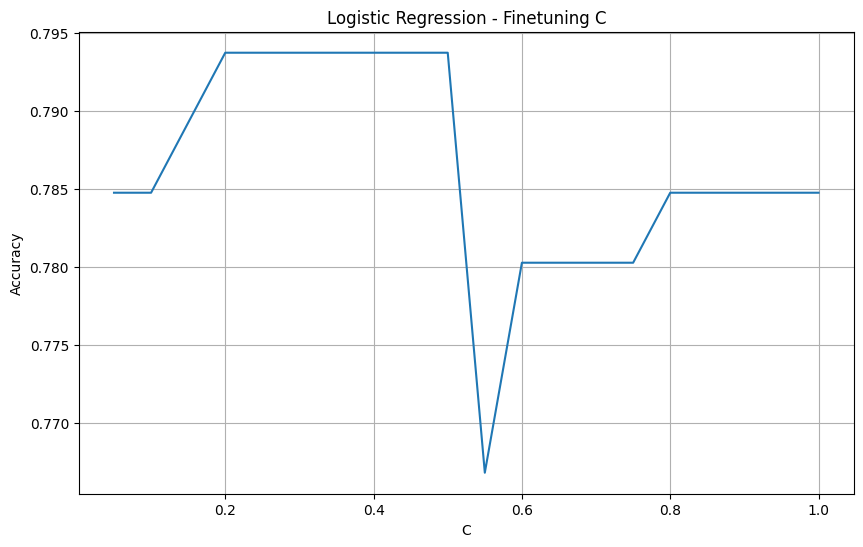

In [82]:
plt.figure(figsize=(10,6))
plt.title('Logistic Regression - Finetuning C')
plt.plot(C_val, scores)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()

Result Logistic Regression - Finetuning C terbaik ada di angka 0,5 dengan nilai 0,794....

# KNN or k-Nearest Neighbors
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [83]:
knn = KNeighborsClassifier()
knn.fit(X_tr, y_tr)
y_pred = knn.predict(X_tt)
score = accuracy_score(y_tt, y_pred)
score

0.8026905829596412

Finetuning dengan K yang berbeda-beda

In [74]:
# import numpy as np

# Ks = np.linspace(3, 20, 10)
# Ks

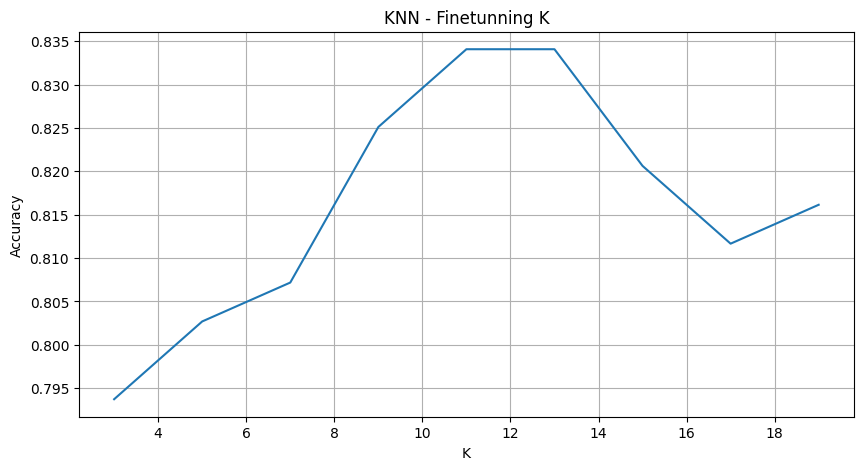

In [85]:
scores = []
Ks = [3, 5, 7, 9, 11, 13, 15, 17, 19]
for k in Ks:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_tr, y_tr)
    y_pred = knn_k.predict(X_tt)
    score = accuracy_score(y_tt, y_pred)
    scores.append(score)

plt.figure(figsize=(10,5))
plt.title('KNN - Finetunning K')
plt.plot(Ks, scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Result KNN Finetunning K yang terbaik ada di K=13

Finetuning dengan berbagai distance measure metrics

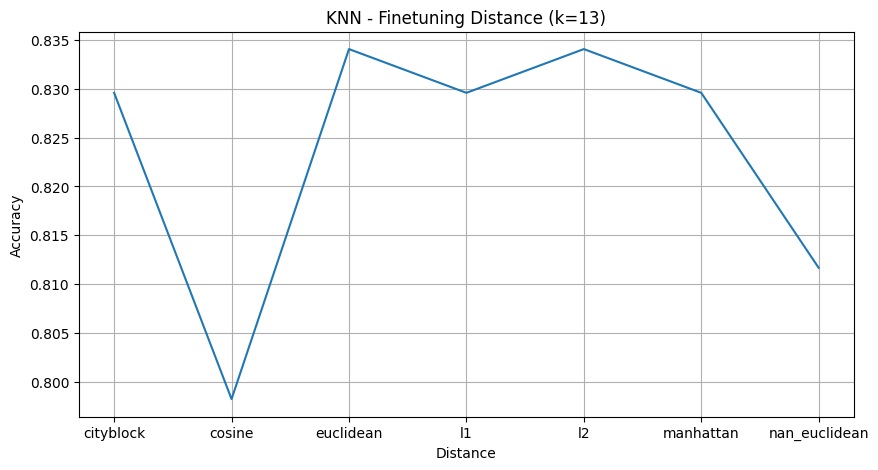

In [87]:
scores=[]
distances = ['cityblock', 'cosine', 'euclidean','l1','l2','manhattan','nan_euclidean']
for dist in distances :
    knn_k = KNeighborsClassifier(n_neighbors=13, metric=dist)
    knn_k.fit(X_tr, y_tr)
    y_pred = knn_k.predict(X_tt)
    score = accuracy_score(y_tt,y_pred)
    scores.append(score)

plt.figure(figsize=(10,5))
plt.title('KNN - Finetuning Distance (k=13)')
plt.plot(distances, scores)
plt.xlabel('Distance')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [88]:
print(scores)

[0.8295964125560538, 0.7982062780269058, 0.8340807174887892, 0.8295964125560538, 0.8340807174887892, 0.8295964125560538, 0.8116591928251121]


# KFold Cross Validation

In [89]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)
print(kf)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

KFold(n_splits=2, random_state=None, shuffle=False)
Fold 0:
  Train: index=[2 3]
  Test:  index=[0 1]
Fold 1:
  Train: index=[0 1]
  Test:  index=[2 3]


In [92]:
kf = KFold(n_splits=4, random_state=123, shuffle=True)

In [93]:
X_train.to_numpy()[0:10:,:]

array([[3, 0, 1, 0, 2, 0],
       [1, 1, 2, 1, 3, 0],
       [3, 1, 1, 0, 4, 1],
       [1, 1, 2, 0, 3, 0],
       [3, 0, 2, 0, 2, 1],
       [3, 0, 1, 2, 2, 1],
       [1, 0, 3, 0, 2, 1],
       [3, 0, 0, 0, 1, 0],
       [3, 1, 1, 0, 3, 0],
       [2, 1, 0, 1, 3, 0]], dtype=int64)

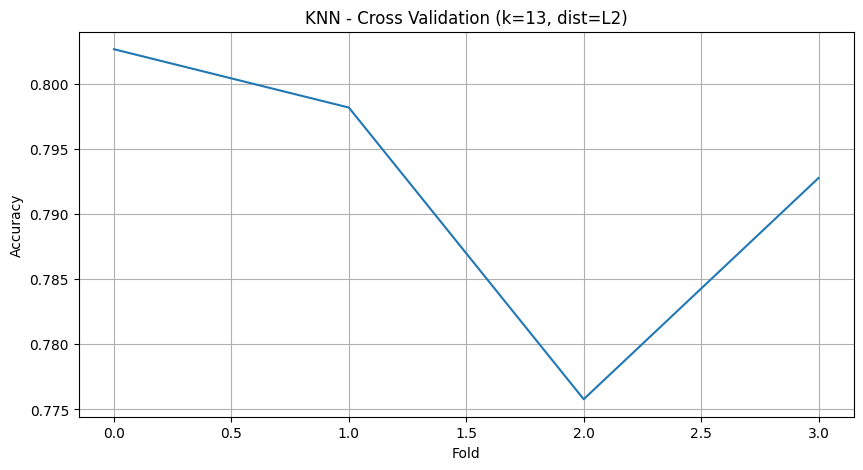

In [95]:
scores = []
fold = []
for idx,(train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):

    # Splitting data here
    X_tr = X_train.to_numpy()[train_idx,:]
    X_tt = X_train.to_numpy()[test_idx,:]
    y_tr = y_train[train_idx]
    y_tt = y_train[test_idx]

    # Start Modelling here
    knn_k = KNeighborsClassifier(n_neighbors=13, metric='l2')
    knn_k.fit(X_tr, y_tr)
    y_pred = knn_k.predict(X_tt)
    score = accuracy_score(y_tt,y_pred)
    scores.append(score)
    fold.append(idx)

plt.figure(figsize=(10,5))
plt.title('KNN - Cross Validation (k=13, dist=L2)')
plt.plot(fold, scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Logistic Regression - Cross Validation

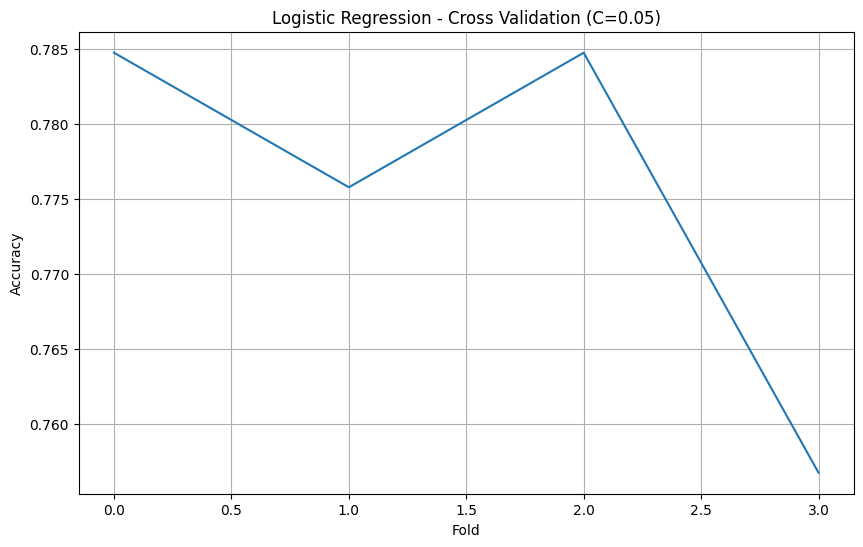

In [98]:
scores = []
fold = []
for idx,(train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):

    # Splitting data here
    X_tr = X_train.to_numpy()[train_idx,:]
    X_tt = X_train.to_numpy()[test_idx,:]
    y_tr = y_train[train_idx]
    y_tt = y_train[test_idx]
    
    # Start Modelling here
    logreg = LogisticRegression(C=0.05)
    logreg.fit(X_tr, y_tr)
    y_pred = logreg.predict(X_tt)
    score = accuracy_score(y_tt,y_pred)
    scores.append(score)
    fold.append(idx)

plt.figure(figsize=(10,6))
plt.title('Logistic Regression - Cross Validation (C=0.05)')
plt.plot(fold, scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid()

# Support Vector Machine (SVC)
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Neural Network

In [83]:
mlp = MLPClassifier(verbose=False, max_iter=400, random_state=123)
mlp.fit(X_tr, y_tr)
y_pred = mlp.predict(X_tt)

score = accuracy_score(y_tt, y_pred)
score

0.7927927927927928